This notebook demonstrates the **SMOS Discrete Global Grid**.

In [1]:
import os.path

import numpy as np
import xarray as xr

from xcube_smos.mldataset.dgg import SmosDiscreteGlobalGrid

The SMOS discrete global grid. Installed by SNAP SMOS-Box in "~/.snap/auxdata":

In [2]:
dgg_path = os.path.expanduser("~/.snap/auxdata/smos-dgg/grid-tiles")

In [3]:
dgg = SmosDiscreteGlobalGrid(dgg_path)

In [4]:
dgg.num_levels

7

In [5]:
dgg.grid_mapping

class: **RegularGridMapping**
* is_regular: True
* is_j_axis_up: False
* is_lon_360: False
* crs: EPSG:4326
* xy_res: (0.02197275, 0.02197275)
* xy_bbox: (-180, -88.593750046875, 180, 88.593750046875)
* ij_bbox: (0, 0, 16384, 8064)
* xy_dim_names: ('lon', 'lat')
* xy_var_names: ('lon', 'lat')
* size: (16384, 8064)
* tile_size: (512, 504)

In [6]:
dgg_ds_0 = dgg.get_dataset(0)

In [7]:
dgg_ds_0

<xarray.Dataset>
Dimensions:  (lat: 8064, lon: 16384)
Coordinates:
  * lat      (lat) float64 88.58 88.56 88.54 88.52 ... -88.54 -88.56 -88.58
  * lon      (lon) float64 -180.0 -180.0 -179.9 -179.9 ... 179.9 180.0 180.0
Data variables:
    seqnum   (lat, lon) uint32 dask.array<chunksize=(504, 512), meta=np.ndarray>

Grid mapping uses CRS **EPSG:4326**. Level 0 has **16384 x 8064 pixels** a spatial resolution of **0.0219 degrees**:

In [8]:
dgg.grid_mapping

class: **RegularGridMapping**
* is_regular: True
* is_j_axis_up: False
* is_lon_360: False
* crs: EPSG:4326
* xy_res: (0.02197275, 0.02197275)
* xy_bbox: (-180, -88.593750046875, 180, 88.593750046875)
* ij_bbox: (0, 0, 16384, 8064)
* xy_dim_names: ('lon', 'lat')
* xy_var_names: ('lon', 'lat')
* size: (16384, 8064)
* tile_size: (512, 504)

In [9]:
dgg.get_dataset(0)

<xarray.Dataset>
Dimensions:  (lat: 8064, lon: 16384)
Coordinates:
  * lat      (lat) float64 88.58 88.56 88.54 88.52 ... -88.54 -88.56 -88.58
  * lon      (lon) float64 -180.0 -180.0 -179.9 -179.9 ... 179.9 180.0 180.0
Data variables:
    seqnum   (lat, lon) uint32 dask.array<chunksize=(504, 512), meta=np.ndarray>

`seqnum` is a chunked 2-D array:

In [10]:
dgg.get_dataset(0).seqnum

<xarray.DataArray 'seqnum' (lat: 8064, lon: 16384)>
dask.array<open_dataset-d2e401c40d2b59b72f49d7d2bda5c393seqnum, shape=(8064, 16384), dtype=uint32, chunksize=(504, 512), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 88.58 88.56 88.54 88.52 ... -88.54 -88.56 -88.58
  * lon      (lon) float64 -180.0 -180.0 -179.9 -179.9 ... 179.9 180.0 180.0

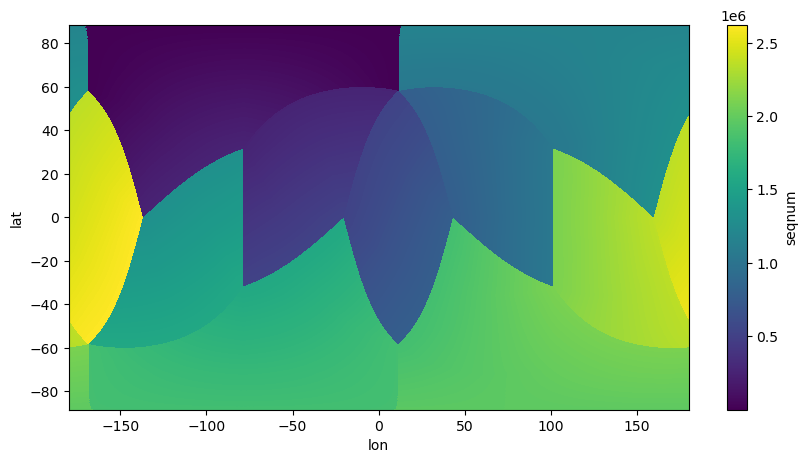

In [11]:
dgg.get_dataset(0).seqnum.plot.imshow(figsize=(10, 5))

In [12]:
dgg.get_dataset(6).seqnum

<xarray.DataArray 'seqnum' (lat: 126, lon: 256)>
dask.array<open_dataset-6dcddb1425ad241009ce1c1da61b18adseqnum, shape=(126, 256), dtype=uint32, chunksize=(126, 256), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 87.89 86.48 85.08 83.67 ... -85.08 -86.48 -87.89
  * lon      (lon) float64 -179.3 -177.9 -176.5 -175.1 ... 176.5 177.9 179.3

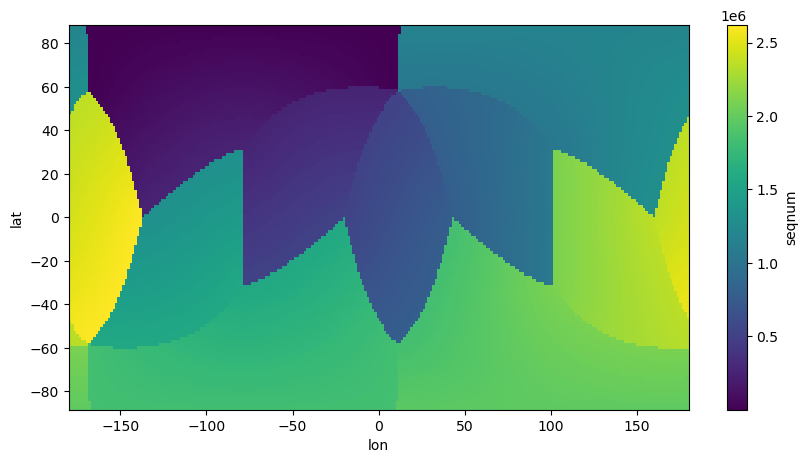

In [13]:
dgg.get_dataset(6).seqnum.plot.imshow(figsize=(10, 5))

Starting at **level 1** (6 levels only) and **loading datasets immediately** for given level (no chunking):

In [14]:
dgg = SmosDiscreteGlobalGrid(dgg_path, level0=1, compute=True)

In [15]:
dgg.num_levels

6

In [16]:
dgg.get_dataset(0)

<xarray.Dataset>
Dimensions:  (lat: 4032, lon: 8192)
Coordinates:
  * lat      (lat) float64 88.57 88.53 88.48 88.44 ... -88.48 -88.53 -88.57
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
Data variables:
    seqnum   (lat, lon) uint32 1185280 1185280 1185280 ... 1972228 1972228

In [17]:
dgg.get_dataset(0).seqnum

<xarray.DataArray 'seqnum' (lat: 4032, lon: 8192)>
array([[1185280, 1185280, 1185280, ..., 1185280, 1185280, 1185280],
       [1185280, 1185280, 1185280, ..., 1185280, 1185280, 1185280],
       [1185792, 1185792, 1185792, ..., 1185792, 1185792, 1185792],
       ...,
       [1972740, 1972740, 1972740, ..., 1972740, 1972740, 1972740],
       [1972228, 1972228, 1972228, ..., 1972228, 1972228, 1972228],
       [1972228, 1972228, 1972228, ..., 1972228, 1972228, 1972228]],
      dtype=uint32)
Coordinates:
  * lat      (lat) float64 88.57 88.53 88.48 88.44 ... -88.48 -88.53 -88.57
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0

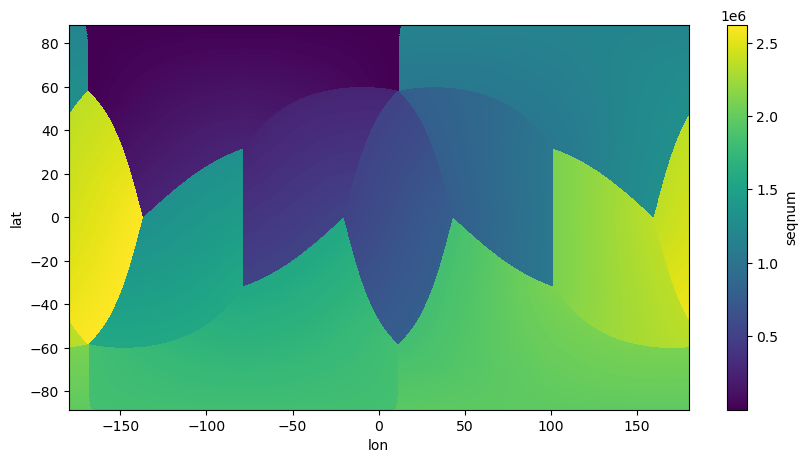

In [18]:
dgg.get_dataset(0).seqnum.plot.imshow(figsize=(10, 5))